# Lab Work 1: Kernel and data analysis
Copernicus Master in Digital Earth
October 2021

### 1. Pointwise function multiplication
To prove the positive definite of the kernel, we check for two conditions: 
- conjugate symmetry
- positive definiteness


In [41]:
# we create a function to check for positive definitiveness in our matrices
import numpy as np
def positive_def(M):
  # check and adjust data type input
  if type(M) != np.ndarray:
    M = np.array(M)
  else:
    pass

  #check for conjugate symmetry
    if np.array_equal(M, M.T):
        try:
            #check for positive definitiveness
            np.linalg.cholesky(M)
            return True
        except np.linalg.LinAlgError:
          return False
    else:
        return False

In [42]:
A = np.ones((3, 4))
print(positive_def(A))
B = np.empty((5, 5))
B.fill(10)
print(positive_def(B))
C = np.array([[8, 5], [5, 8]])
print(positive_def(C))

False
False
True


### 2. Kernel Ridge Regression
Given a set of points following roughly a linear trend $(y = ax + b)$ with $x \in [-5, 5]$


In [114]:
# define point x between -5 and 5
import random
x = np.arange(-5, 6).reshape(-1, 1)
#y = [random.uniform(-1, 1) + i for i in x]
y = np.array([-4.291, -2.860, -2.918, -1.954, -1.426, 1.988, 0.157, 0.593, 2.044, 3.042, 4.309]).reshape(-1, 1)

In [115]:
# create an arbitrary value of x within the range of -5 and 5
new_x = np.linspace(-5, 5, 1000).reshape(-1, 1)

In [142]:
class Kernel(self, X, Y, x_test):
  self.

def linear_regressor(X, Y, x_test):
  """
  A Function to create the Linear Regression Model. 
  Input: X, Y and X_test
  Output: Y_Predict
  """
  from sklearn import linear_model
  # initiate the linear regression model
  lm = linear_model.LinearRegression()
  lm.fit(X, Y)
  y_predict = lm.predict(x_test)
  return y_predict


def plot(X, Y, x_test, y_pred):
   """
  A Function to plot the Predicted versus Original
  Input data points. 
  Input: X, Y, X_test, and Y_Predict
  Output: Graph of Linear Model and Original datapoints
  """
  import matplotlib.pyplot as plt

  fig, ax = plt.subplots()
  ax.xaxis.set_ticks(range(-5,6))
  ax.yaxis.set_ticks(range(-5,6))
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  
  # plot regression line
  plt.plot(x_test, y_pred, color='red', linestyle='solid', linewidth=2, label = "Predicted")
  # Plot as blue points the original database
  plt.scatter(X, Y, color='blue', label = "Original Points")
  plt.legend()

In [143]:
y_pred = linear_regressor(x, y, new_x)

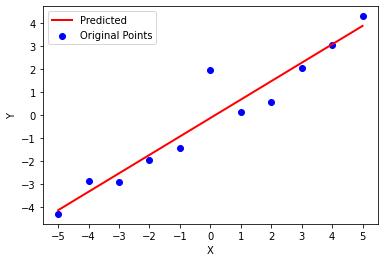

In [145]:
plot(x, y, new_x, y_pred)

Let us consider a new set of 21 points that do not follow the linear trend anymore but $x \in [-5, 5] $. We provide a linear regression on the previous 21 points and display the predictions on 1000 values of x taken incrementally in  $ [-5, 5] $ and display the results. 

In [118]:
# create an arbitrary value of x within the range of -5 and 5
xn = np.linspace(-5, 5, 21).reshape(-1, 1)
yn = [-192.239, 71.537, 0.537, -35.671, -48.052, -42.445, -29.914, -13.828, -0.084, 8.668, 11.419, 8.778, 0.209, -10.370, -18.790, -16.722, -0.018, 42.934, 120.075, 245.389, 431.082]
yn = np.array(yn).reshape(-1, 1)

In [120]:
# initiate the linear regression model
lm= linear_model.LinearRegression()
lm.fit(xn,yn)
pred_yn = lm.predict(new_x)

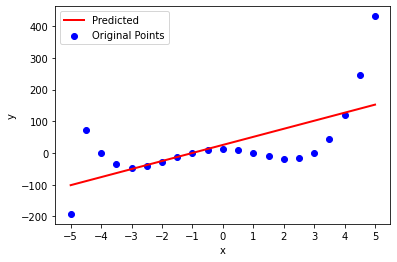

In [123]:
fig, ax = plt.subplots()
ax.xaxis.set_ticks(range(-5,6))
#ax.yaxis.set_ticks(range(-5,6))
ax.set_xlabel('x')
ax.set_ylabel('y')

# plot regression line
plt.plot(new_x, pred_y, color='red', linestyle='solid', linewidth=2, label = "Predicted")
# Plot as blue points the original database
plt.scatter(xn, yn,color='blue', label = "Original Points")
#plt.scatter(new_x, pred_yn, label = "Predicted Point")
plt.legend()

Provide a Kernel Ridge Regression on the previous 21 points and display the results. 

In [132]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score
import math

y_pred_list = []
rmse_list = []

polynom_degree = [2, 3, 4, 5]
for deg in polynom_degree: 
  Ridge_regressor = KernelRidge(kernel='polynomial', degree=deg, alpha = 1.0)
  Ridge_regressor.fit(xn, yn)
  y_ridge = Ridge_regressor.predict(new_x)
  y_pred_list.append(y_ridge)
  
  #RMSE
  rmse = math.sqrt(mean_squared_error(Ridge_regressor.predict(xn), yn))
  rmse_list.append(rmse)
  
  print("__________________________________________________")
  print("Polynomial degree: ", deg)
  print("Root Mean Squared Error: %.1f" % rmse)
  print("__________________________________________________")




__________________________________________________
Polynomial degree:  2
Root Mean Squared Error: 76.5
__________________________________________________
__________________________________________________
Polynomial degree:  3
Root Mean Squared Error: 50.1
__________________________________________________
__________________________________________________
Polynomial degree:  4
Root Mean Squared Error: 45.1
__________________________________________________
__________________________________________________
Polynomial degree:  5
Root Mean Squared Error: 34.3
__________________________________________________


Text(0.15, 0.85, '$RMSE$ = 34.3')

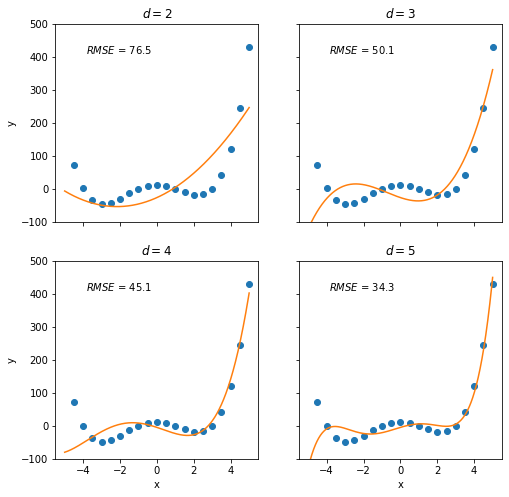

In [136]:
# # Set axes and labels

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


# Subplot top-left
axs[0, 0].scatter(xn, yn, color='C0')
axs[0, 0].plot(new_x, y_pred_list[0], color='C1')
axs[0, 0].set_title(r'$d = 2$')
axs[0, 0].set_xlim(-5.5,5.5)
axs[0, 0].set_ylim(-100,500)
axs[0, 0].annotate(u'$RMSE$ = %.1f' % rmse_list[0], xy=(0.15,0.85), xycoords='axes fraction')

# Subplot top-right
axs[0, 1].scatter(xn, yn, color='C0')
axs[0, 1].plot(new_x, y_pred_list[1], color='C1')
axs[0, 1].set_title(r'$d = 3$')
axs[0, 1].set_xlim(-5.5,5.5)
axs[0, 1].set_ylim(-100,500)
axs[0, 1].annotate(u'$RMSE$ = %.1f' % rmse_list[1], xy=(0.15,0.85), xycoords='axes fraction')

# Subplot bottom-left
axs[1, 0].scatter(xn, yn, color='C0')
axs[1, 0].plot(new_x, y_pred_list[2], color='C1')
axs[1, 0].set_title(r'$d = 4$')
axs[1, 0].set_xlim(-5.5,5.5)
axs[1, 0].set_ylim(-100,500)
axs[1, 0].annotate(u'$RMSE$ = %.1f' % rmse_list[2], xy=(0.15,0.85), xycoords='axes fraction')

# Subplot bottom-right
axs[1, 1].scatter(xn, yn, color='C0')
axs[1, 1].plot(new_x, y_pred_list[3], color='C1')
axs[1, 1].set_title(r'$d = 5$')
axs[1, 1].set_xlim(-5.5,5.5)
axs[1, 1].set_ylim(-100,500)
axs[1, 1].annotate(u'$RMSE$ = %.1f' % rmse_list[3], xy=(0.15,0.85), xycoords='axes fraction')